# DATA PREPRPOCESSING FOR EDA

### import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import libraries untuk EDA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('halo')
print('halo')

### import data

In [10]:
df = pd.read_csv('../data/raw/data_capstone.csv')
df.head()

,customer_id,plan_type,device_brand,avg_data_usage_gb,pct_video_usage,avg_call_duration,sms_freq,monthly_spend,topup_freq,travel_score,complaint_count,target_offer
0,C00001,Prepaid,Realme,1.50,0.804146,7.98,13,70000.0,4,0.284419,0,General Offer
1,C00002,Postpaid,Vivo,1.09,0.107686,9.56,9,63000.0,3,0.115086,0,General Offer
2,C00003,Postpaid,Xiaomi,3.24,0.313894,4.61,13,89000.0,7,0.402998,0,General Offer
3,C00004,Prepaid,Apple,5.32,0.420158,6.96,8,67000.0,4,0.302169,0,General Offer
4,C00005,Prepaid,Huawei,1.91,0.251638,11.01,21,72000.0,5,0.487911,0,General Offer


## DATA CLEANING

In [11]:
df.isnull().sum()

customer_id          0
plan_type            0
device_brand         0
avg_data_usage_gb    0
pct_video_usage      0
avg_call_duration    0
sms_freq             0
monthly_spend        0
topup_freq           0
travel_score         0
complaint_count      0
target_offer         0
dtype: int64

In [12]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(df.columns.tolist())

Jumlah baris: 10000
Jumlah kolom: 12
['customer_id', 'plan_type', 'device_brand', 'avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count', 'target_offer']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        10000 non-null  object 
 1   plan_type          10000 non-null  object 
 2   device_brand       10000 non-null  object 
 3   avg_data_usage_gb  10000 non-null  float64
 4   pct_video_usage    10000 non-null  float64
 5   avg_call_duration  10000 non-null  float64
 6   sms_freq           10000 non-null  int64  
 7   monthly_spend      10000 non-null  float64
 8   topup_freq         10000 non-null  int64  
 9   travel_score       10000 non-null  float64
 10  complaint_count    10000 non-null  int64  
 11  target_offer       10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_data_usage_gb,10000.0,5.958883,4.192909,0.030000,2.870000,4.990000,8.040000,39.020000
pct_video_usage,10000.0,0.402639,0.195741,0.000000,0.265290,0.400116,0.535161,1.000000
avg_call_duration,10000.0,9.971357,4.954993,-8.370000,6.650000,10.020000,13.320000,27.770000
sms_freq,10000.0,15.010800,3.872775,4.000000,12.000000,15.000000,18.000000,31.000000
monthly_spend,10000.0,109776.500000,46237.321903,-13000.000000,78000.000000,102000.000000,135000.000000,450000.000000
topup_freq,10000.0,2.986600,1.709828,0.000000,2.000000,3.000000,4.000000,12.000000
travel_score,10000.0,0.282441,0.158366,0.003376,0.158775,0.261206,0.385656,0.854814
complaint_count,10000.0,0.492600,0.704127,0.000000,0.000000,0.000000,1.000000,5.000000


# EDA

In [15]:
# --- SUMMARY STATISTICS ---
print("\n--- NUMERIC SUMMARY ---")
display(df.describe().T)
print("\n--- CATEGORICAL SUMMARY ---")
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts().head(20))



--- NUMERIC SUMMARY ---


,count,mean,std,min,25%,50%,75%,max
avg_data_usage_gb,10000.0,5.958883,4.192909,0.030000,2.870000,4.990000,8.040000,39.020000
pct_video_usage,10000.0,0.402639,0.195741,0.000000,0.265290,0.400116,0.535161,1.000000
avg_call_duration,10000.0,9.971357,4.954993,-8.370000,6.650000,10.020000,13.320000,27.770000
sms_freq,10000.0,15.010800,3.872775,4.000000,12.000000,15.000000,18.000000,31.000000
monthly_spend,10000.0,109776.500000,46237.321903,-13000.000000,78000.000000,102000.000000,135000.000000,450000.000000
topup_freq,10000.0,2.986600,1.709828,0.000000,2.000000,3.000000,4.000000,12.000000
travel_score,10000.0,0.282441,0.158366,0.003376,0.158775,0.261206,0.385656,0.854814
complaint_count,10000.0,0.492600,0.704127,0.000000,0.000000,0.000000,1.000000,5.000000



--- CATEGORICAL SUMMARY ---

Value counts for customer_id:


customer_id
C00001    1
C06671    1
C06664    1
C06665    1
C06666    1
C06667    1
C06668    1
C06669    1
C06670    1
C06672    1
C06662    1
C06673    1
C06674    1
C06675    1
C06676    1
C06677    1
C06678    1
C06679    1
C06663    1
C06661    1
Name: count, dtype: int64


Value counts for plan_type:


plan_type
Prepaid     6108
Postpaid    3892
Name: count, dtype: int64


Value counts for device_brand:


device_brand
Realme     1509
Xiaomi     1458
Samsung    1439
Huawei     1438
Vivo       1395
Apple      1386
Oppo       1375
Name: count, dtype: int64


Value counts for target_offer:


target_offer
General Offer             6070
Device Upgrade Offer      1502
Data Booster               797
Retention Offer            761
Top-up Promo               370
Streaming Partner Pack     258
Roaming Pass                93
Family Plan Offer           81
Voice Bundle                68
Name: count, dtype: int64

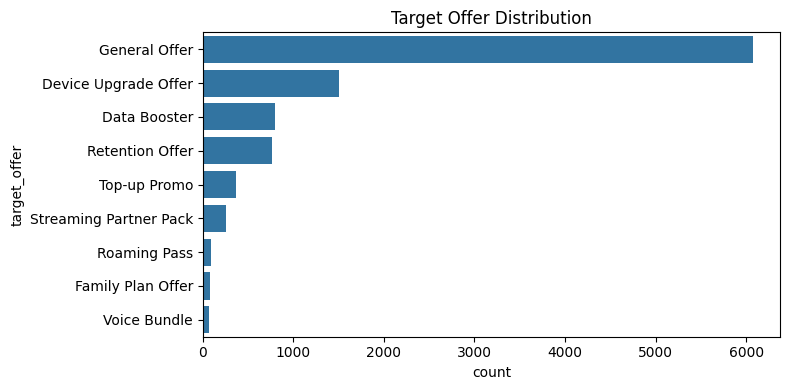

In [17]:
# --- TARGET DISTRIBUTION ---
plt.figure(figsize=(8,4))
order = df['target_offer'].value_counts().index
sns.countplot(data=df, y='target_offer', order=order)
plt.title("Target Offer Distribution")
plt.tight_layout()
plt.show()


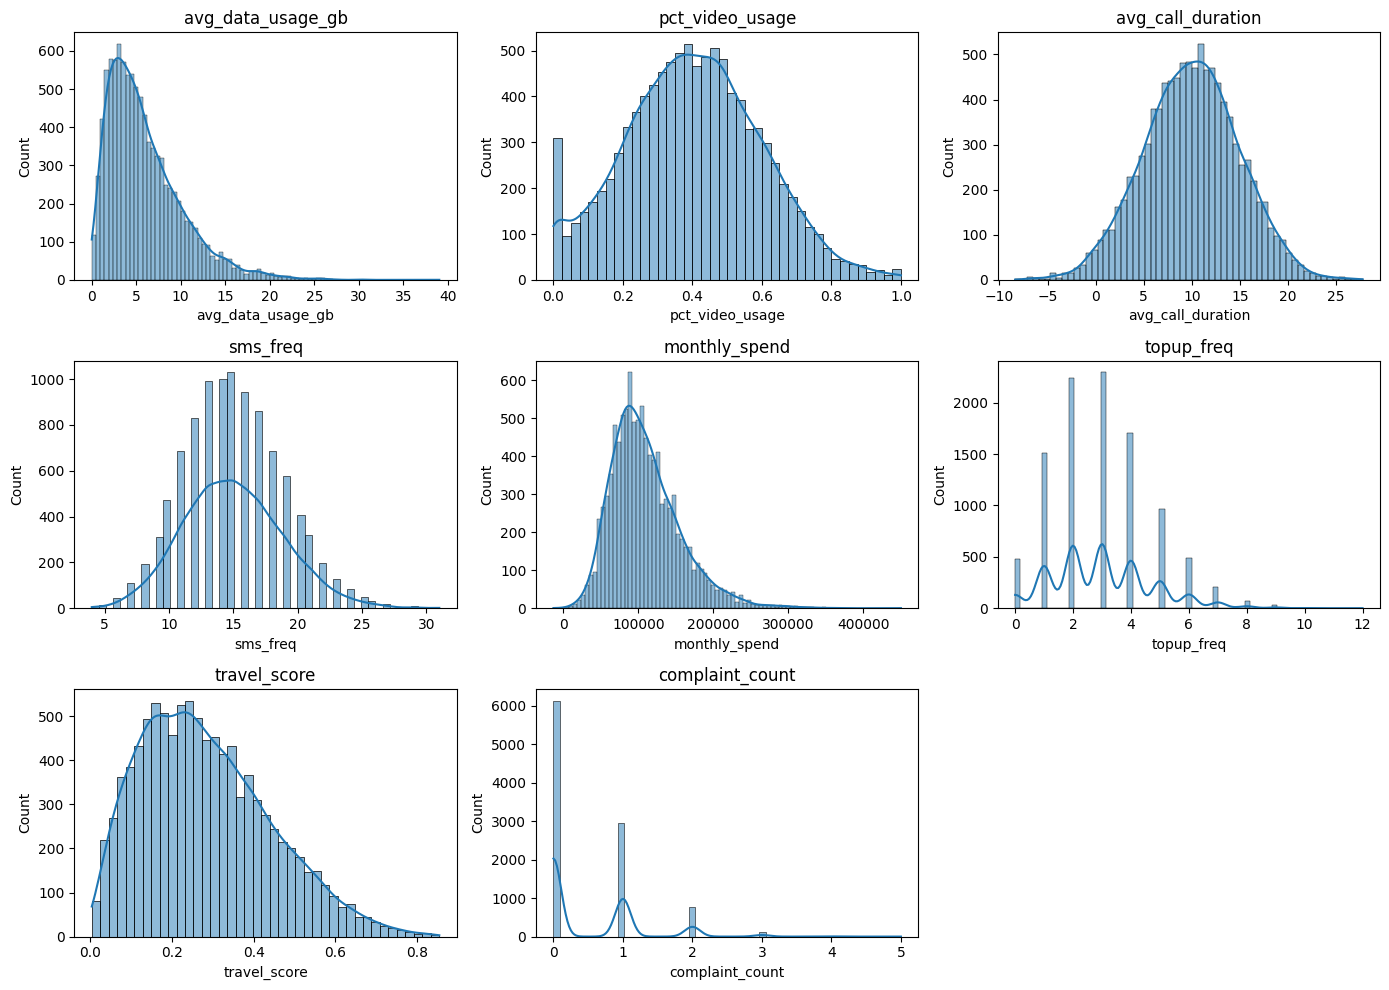

In [18]:
# --- NUMERIC FEATURE DISTRIBUTIONS ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(int(np.ceil(len(num_cols)/3)), 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


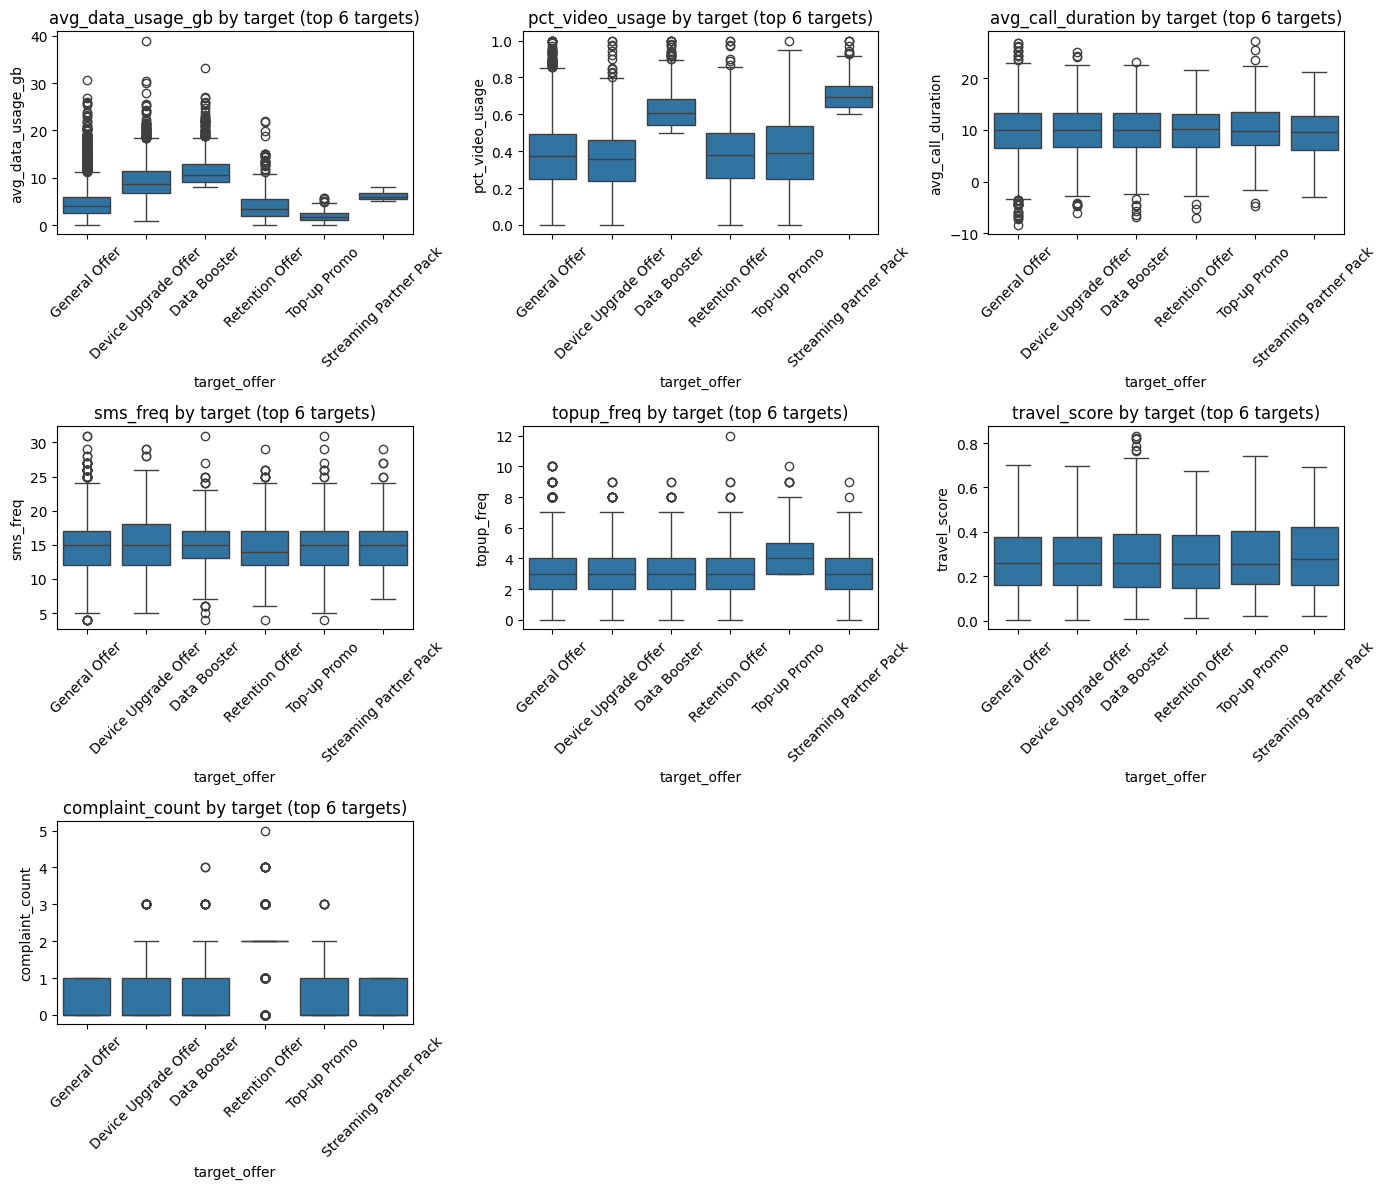

In [19]:

# --- BOXPLOTS of numeric features by target (useful for spotting separability) ---
# Focus on top 6 target offers for clarity
top_targets = df['target_offer'].value_counts().index[:6].tolist()
sample_df = df[df['target_offer'].isin(top_targets)]
plt.figure(figsize=(14, 12))
for i, col in enumerate([c for c in num_cols if c != 'monthly_spend'][:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='target_offer', y=col, data=sample_df, order=top_targets)
    plt.xticks(rotation=45)
    plt.title(f"{col} by target (top {len(top_targets)} targets)")
plt.tight_layout()
plt.show()

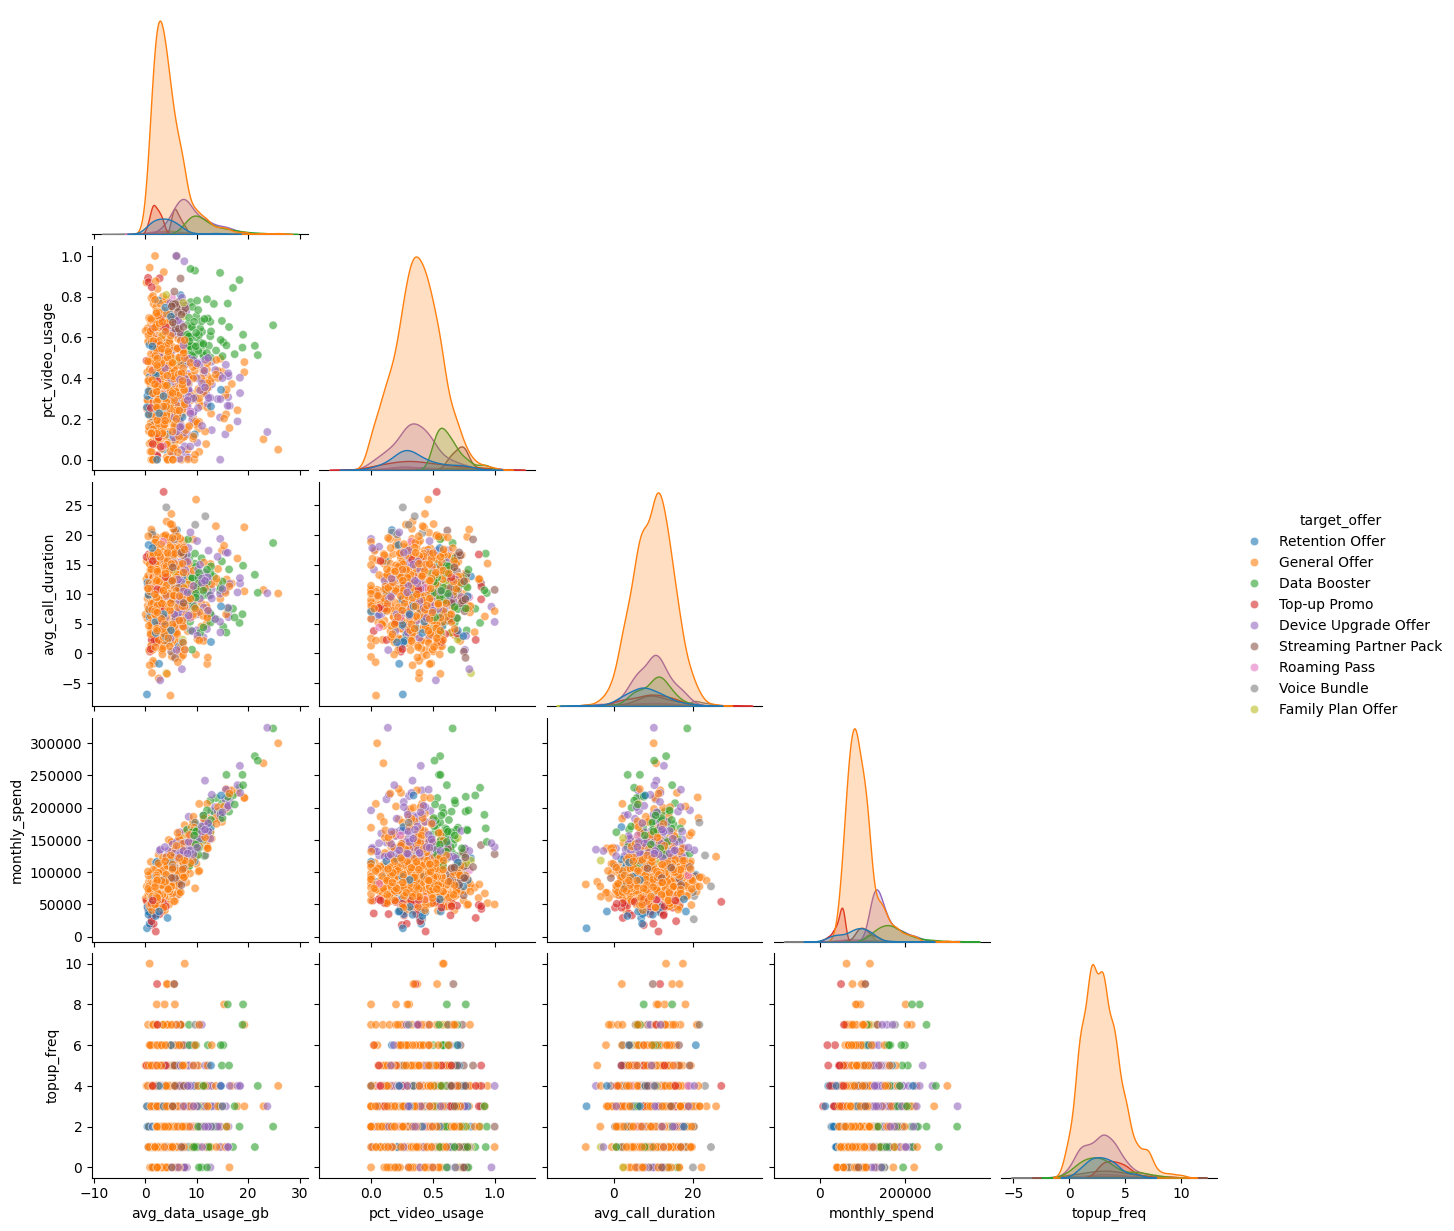

In [21]:

# --- PAIRPLOT (sampled to speed up) ---
sample = df.sample(n=min(1000, len(df)), random_state=42)
pair_cols = ['avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 'monthly_spend', 'topup_freq']
sns.pairplot(sample[pair_cols + ['target_offer']], hue='target_offer', corner=True, plot_kws={'alpha':0.6}, kind='scatter', diag_kind='kde')
plt.show()


In [ ]:
# --- CORRELATION HEATMAP ---
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Numeric Features Correlation Matrix")
plt.tight_layout()
plt.savefig(f"{PLOT_DIR}/correlation_heatmap.png")
plt.show()


<Figure size 1000x400 with 0 Axes>

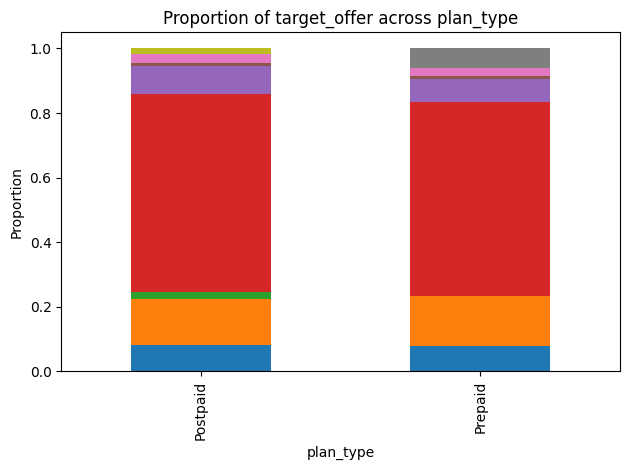

<Figure size 1000x400 with 0 Axes>

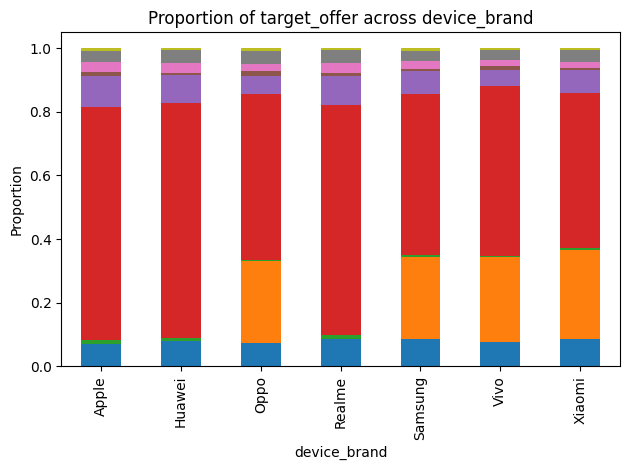

<Figure size 1000x400 with 0 Axes>

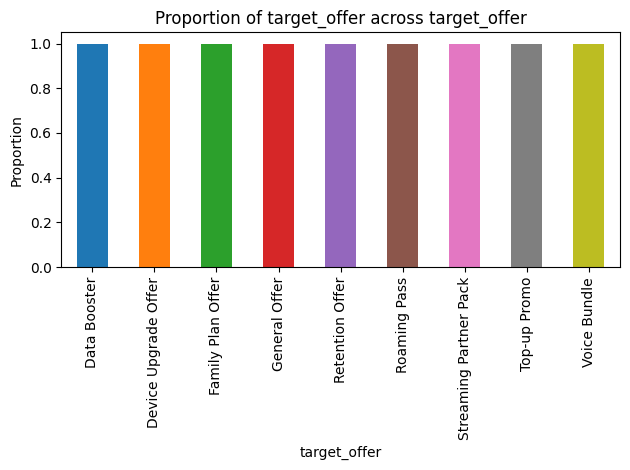

In [22]:
# --- CATEGORICAL vs TARGET (proportions) ---
cat_cols = [c for c in df.select_dtypes(include=['object', 'category']).columns if c != 'customer_id']
for col in cat_cols:
    prop = (df.groupby([col, 'target_offer']).size().unstack(fill_value=0))
    prop = prop.divide(prop.sum(axis=1), axis=0)  # proportion per category value
    plt.figure(figsize=(10, max(4, 0.25*len(prop))))
    prop.plot(kind='bar', stacked=True, legend=False)
    plt.title(f"Proportion of target_offer across {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.tight_layout()
    plt.show()

In [23]:
# --- QUICK FEATURE IMPORTANCE PREP (encoding + simple tree) ---
# This is just to get an initial feel — you can skip if you only want visualization.
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

fe_cols = [c for c in df.columns if c not in ['customer_id', 'target_offer']]
X = df[fe_cols].copy()
y = df['target_offer'].copy()
# simple encode categoricals
cat_feats = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_feats:
    enc = OrdinalEncoder()
    X[cat_feats] = enc.fit_transform(X[cat_feats].astype(str))
X = X.fillna(-999)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
imp = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop feature importances (DecisionTree, depth=6):")
display(imp.head(20))


Top feature importances (DecisionTree, depth=6):


monthly_spend        0.274486
complaint_count      0.177292
device_brand         0.170882
pct_video_usage      0.138131
avg_data_usage_gb    0.130795
plan_type            0.041409
topup_freq           0.028904
travel_score         0.027488
avg_call_duration    0.007678
sms_freq             0.002934
dtype: float64

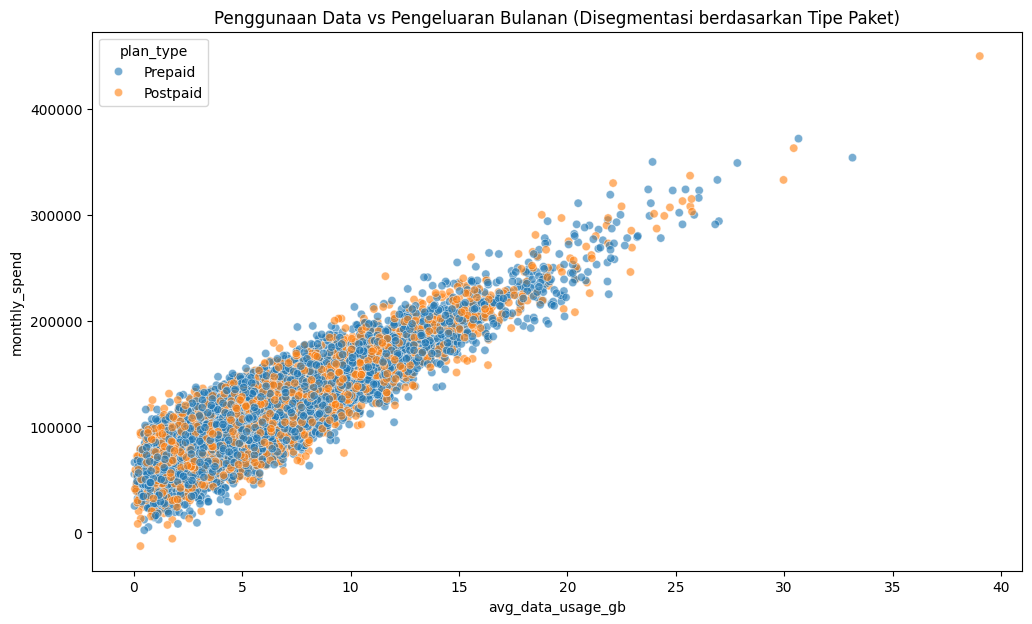

In [24]:
# 1. Interaksi antara Penggunaan Data, Pengeluaran, dan Tipe Paket
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, 
                x='avg_data_usage_gb', 
                y='monthly_spend', 
                hue='plan_type', 
                alpha=0.6)
plt.title('Penggunaan Data vs Pengeluaran Bulanan (Disegmentasi berdasarkan Tipe Paket)')
plt.show()

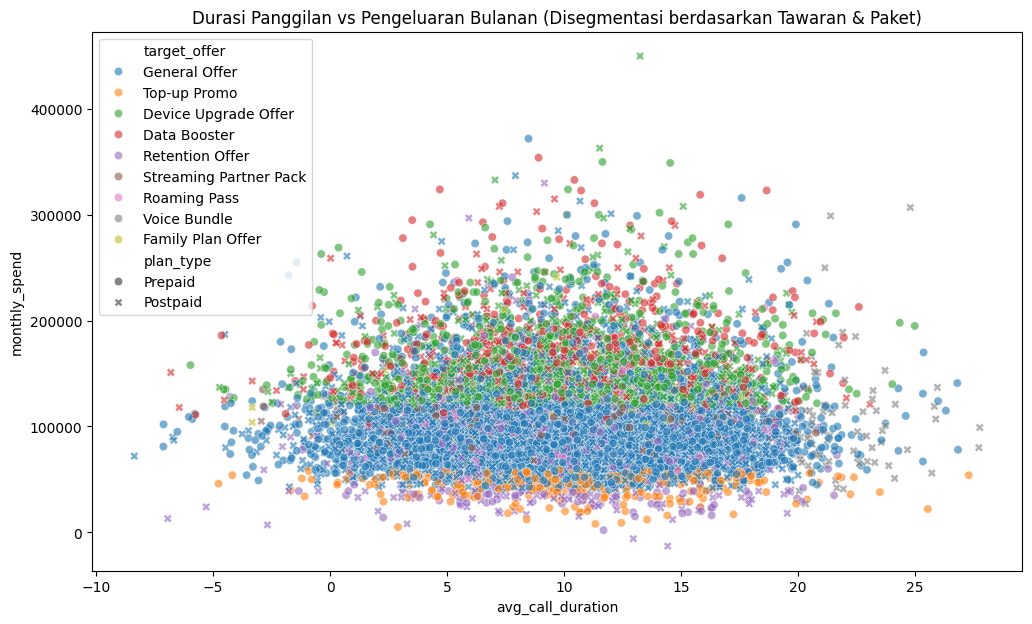

In [25]:
# 2. Interaksi antara Durasi Panggilan, Pengeluaran, dan Target Offer
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, 
                x='avg_call_duration', 
                y='monthly_spend', 
                hue='target_offer', 
                style='plan_type',
                alpha=0.6)
plt.title('Durasi Panggilan vs Pengeluaran Bulanan (Disegmentasi berdasarkan Tawaran & Paket)')
plt.show()

In [ ]:
from scipy import stats

# Pisahkan data
postpaid_spend = df[df['plan_type'] == 'Postpaid']['monthly_spend']
prepaid_spend = df[df['plan_type'] == 'Prepaid']['monthly_spend']

# Lakukan uji (Mann-Whitney U lebih aman untuk data dunia nyata)
stat, p_value = stats.mannwhitneyu(postpaid_spend.dropna(), prepaid_spend.dropna())

print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Signifikan: Ada perbedaan nyata dalam pengeluaran antara pelanggan Pascabayar dan Prabayar.")
else:
    print("Tidak Signifikan: Tidak ada perbedaan pengeluaran yang terbukti secara statistik.")

P-value: 0.45300630612738235
Tidak Signifikan: Tidak ada perbedaan pengeluaran yang terbukti secara statistik.


In [ ]:
from scipy.stats import chi2_contingency

# Buat tabel kontingensi
contingency_table = pd.crosstab(df['device_brand'], df['plan_type'])

# Lakukan uji Chi-Square
stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Signifikan: Ada asosiasi antara merek perangkat dan tipe paket.")
else:
    print("Tidak Signifikan: Merek perangkat dan tipe paket bersifat independen.")

P-value: 0.8783180435599816
Tidak Signifikan: Merek perangkat dan tipe paket bersifat independen.


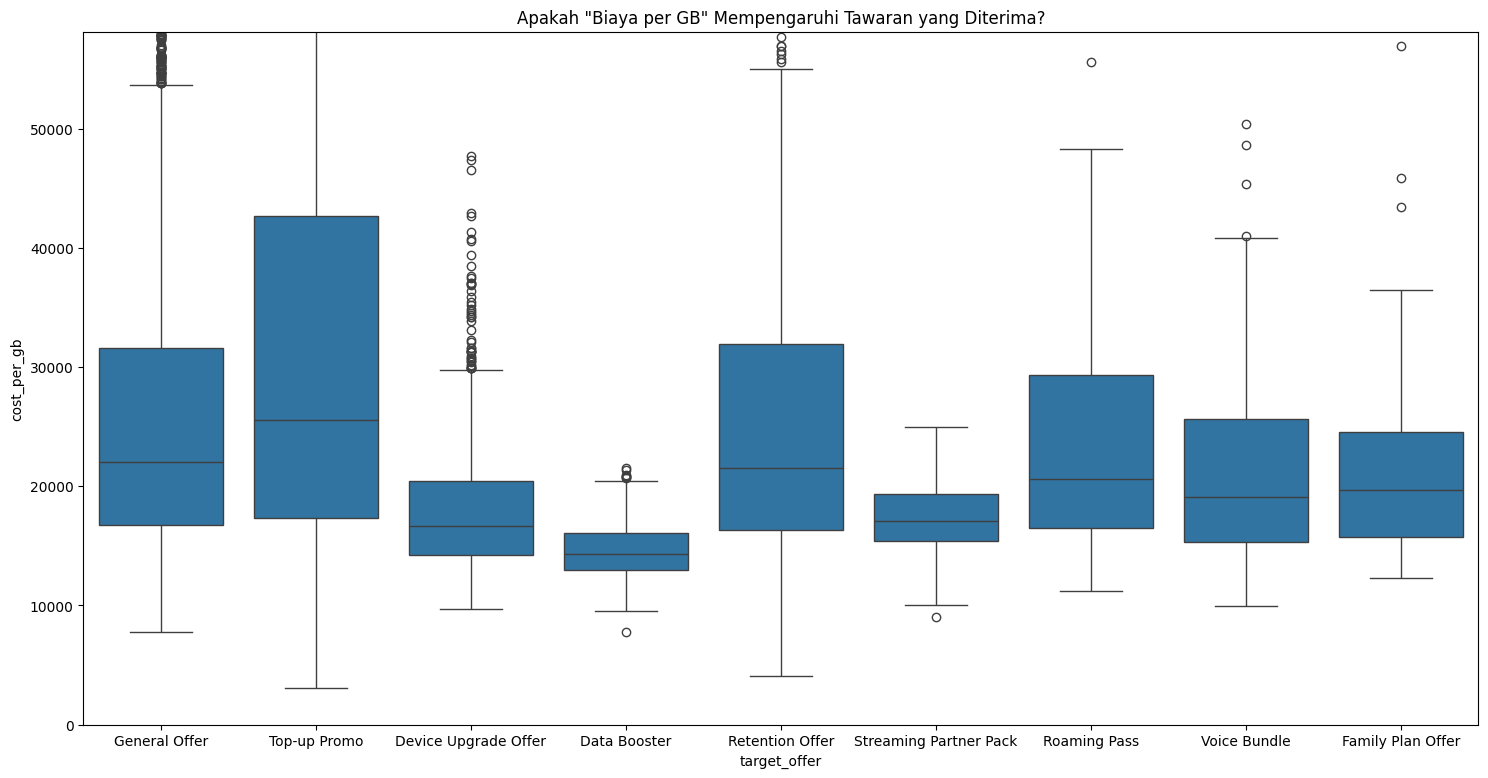

In [ ]:
# (PENTING: Pastikan untuk menangani nilai negatif/nol sebelum melakukan pembagian)
# Asumsikan Anda telah membersihkan 'monthly_spend' dan 'avg_data_usage_gb' dari nilai <= 0
df_cleaned = df[df['monthly_spend'] > 0].copy()
df_cleaned['avg_data_usage_gb_safe'] = df_cleaned['avg_data_usage_gb'].apply(lambda x: x if x > 0 else 0.1) # Hindari pembagian dengan nol

# 1. Fitur Baru: Biaya per GB
df_cleaned['cost_per_gb'] = df_cleaned['monthly_spend'] / df_cleaned['avg_data_usage_gb_safe']

# 2. Fitur Baru: Skor Keterlibatan (contoh sederhana)
# (Kita perlu men-scaling ini agar adil, tapi untuk EDA cepat, penjumlahan sederhana sudah cukup)
df_cleaned['engagement_score'] = df_cleaned['avg_call_duration'] + df_cleaned['sms_freq'] + df_cleaned['topup_freq']

# Sekarang, visualisasikan fitur BARU Anda
plt.figure(figsize=(18, 9))
sns.boxplot(data=df_cleaned, x='target_offer', y='cost_per_gb')
plt.title('Apakah "Biaya per GB" Mempengaruhi Tawaran yang Diterima?')
plt.ylim(0, df_cleaned['cost_per_gb'].quantile(0.95)) # Potong outlier ekstrem agar plot terlihat
plt.show()

In [26]:
# Save feature importances
import os
PLOT_DIR = "./plots"
os.makedirs(PLOT_DIR, exist_ok=True)
print(f"Saving plots to: {PLOT_DIR}")
imp.head(20).to_csv(f"{PLOT_DIR}/feature_importances_top20.csv")
print(f"\nPlots and artifacts saved into {PLOT_DIR}/")

Saving plots to: ./plots

Plots and artifacts saved into ./plots/


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Pilih fitur perilaku
features = ['avg_data_usage_gb', 'pct_video_usage', 'avg_call_duration', 
            'sms_freq', 'monthly_spend', 'topup_freq', 'travel_score', 'complaint_count']

# Asumsikan df_cleaned adalah data Anda yang sudah bersih dari null/negatif
df_cluster = df_cleaned[features].dropna()

# 2. Scale fitur
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# 3. Jalankan K-Means (misalnya kita pilih k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(df_scaled)

# 4. Analisis Cluster!
cluster_analysis = df_cluster.groupby('cluster')[features].mean()
print(cluster_analysis)

         avg_data_usage_gb  pct_video_usage  avg_call_duration   sms_freq  \
cluster                                                                     
0                 4.535094         0.401998           9.447710  15.331654   
1                12.487460         0.410269          10.048493  14.885585   
2                 4.190870         0.401034          10.356729  14.992903   
3                 4.374093         0.399255           9.868517  14.857143   

         monthly_spend  topup_freq  travel_score  complaint_count  
cluster                                                            
0         94641.777371    3.203390      0.486340         0.248282  
1        179020.665323    3.041331      0.271805         0.438508  
2         91201.481024    2.852823      0.192571         0.000000  
3         92826.254826    2.929344      0.230972         1.356757  


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# 1. Create some sample data
# Let's create 15 data points in a 2D space
X = np.array([
    [1, 2], [1, 4], [1, 0],
    [10, 2], [10, 4], [10, 0],
    [5, 8], [5, 6], [5, 10],
    [8, 8], [8, 6], [8, 10],
    [2, 12], [2, 14], [2, 10]
])

# 2. Initialize and fit the K-Means model
# We will look for 3 clusters in this data
# n_init='auto' is set to avoid a FutureWarning
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

# 3. Print the results of the cluster

# Print the cluster assignment for each data point
# The output will be an array where the index corresponds to the data point
# and the value is the cluster it belongs to (e.g., 0, 1, or 2).
print("Cluster labels for each data point:")
print(kmeans.labels_)
# Example output: [0 0 0 1 1 1 2 2 2 2 2 2 0 0 0]

print("-" * 30)

# Print the coordinates of the cluster centers (centroids)
print("Cluster centroids:")
print(kmeans.cluster_centers_)
# Example output:
# [[ 1.66  6.  ]
#  [10.    2.  ]
#  [ 6.5   8.5 ]]

print("-" * 30)

# You can also print a more detailed summary
for i in range(len(X)):
    print(f"Data point {X[i]} is in Cluster {kmeans.labels_[i]}")



Cluster labels for each data point:
[2 2 2 1 1 1 0 0 0 0 1 0 0 0 0]
------------------------------
Cluster centroids:
[[4.625 9.75 ]
 [9.5   3.   ]
 [1.    2.   ]]
------------------------------
Data point [1 2] is in Cluster 2
Data point [1 4] is in Cluster 2
Data point [1 0] is in Cluster 2
Data point [10  2] is in Cluster 1
Data point [10  4] is in Cluster 1
Data point [10  0] is in Cluster 1
Data point [5 8] is in Cluster 0
Data point [5 6] is in Cluster 0
Data point [ 5 10] is in Cluster 0
Data point [8 8] is in Cluster 0
Data point [8 6] is in Cluster 1
Data point [ 8 10] is in Cluster 0
Data point [ 2 12] is in Cluster 0
Data point [ 2 14] is in Cluster 0
Data point [ 2 10] is in Cluster 0


In [27]:
from scipy import stats

summary = {}

summary['rows'], summary['cols'] = df.shape
summary['plan_type_dist'] = df['plan_type'].value_counts(normalize=True).mul(100).round(2).to_dict()

target_counts = df['target_offer'].value_counts()
target_pct = target_counts / target_counts.sum() * 100
summary['target_top5'] = pd.DataFrame({'count': target_counts.head(5),
                                       'pct': target_pct.head(5).round(2)})

# Feature importances (assumes CSV exists)
fi = pd.read_csv('./plots/feature_importances_top20.csv', header=None)
# Try to infer format; adjust if needed
if fi.shape[1] == 2:
    fi.columns = ['feature','importance']
else:
    fi = fi.rename(columns={0:'feature',1:'importance'})
summary['fi_top5'] = fi.head(5)

# Correlations with monthly_spend
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
ms_corr = corr['monthly_spend'].drop('monthly_spend').sort_values(key=lambda s: s.abs(), ascending=False)
summary['monthly_spend_top_corr'] = ms_corr.head(5)

# Mann-Whitney U
post = df[df['plan_type']=='Postpaid']['monthly_spend'].dropna()
pre = df[df['plan_type']=='Prepaid']['monthly_spend'].dropna()
u_stat, p_val = stats.mannwhitneyu(post, pre)
summary['mannwhitney'] = {'p_value': p_val, 'median_postpaid': post.median(), 'median_prepaid': pre.median()}

# Chi-square brand vs plan
import scipy.stats as ss
ct = pd.crosstab(df['device_brand'], df['plan_type'])
chi2, p_brand, dof, expected = ss.chi2_contingency(ct)
residuals = (ct - expected) / np.sqrt(expected)
top_resid = residuals.stack().reindex(residuals.stack().abs().sort_values(ascending=False).index).head(4)
summary['chi_square'] = {'p_value': p_brand, 'top_standardized_residuals': top_resid.to_dict()}

# Engineered features distribution (if already created)
if 'cost_per_gb' in df.columns:
    eng_summary = df.groupby('target_offer')[['cost_per_gb']].median().rename(columns={'cost_per_gb':'median_cost_per_gb'})
else:
    eng_summary = None
summary['engineered_cost_medians'] = eng_summary.head(5) if eng_summary is not None else 'cost_per_gb not present in base df_cleaned only'

print("=== QUICK SUMMARY DUMP ===")
for k,v in summary.items():
    print(f"\n{k}:\n{v}")

=== QUICK SUMMARY DUMP ===

rows:
10000

cols:
12

plan_type_dist:
{'Prepaid': 61.08, 'Postpaid': 38.92}

target_top5:
                      count    pct
target_offer                      
General Offer          6070  60.70
Device Upgrade Offer   1502  15.02
Data Booster            797   7.97
Retention Offer         761   7.61
Top-up Promo            370   3.70

fi_top5:
           feature  importance
0              NaN    0.000000
1    monthly_spend    0.274486
2  complaint_count    0.177292
3     device_brand    0.170882
4  pct_video_usage    0.138131

monthly_spend_top_corr:
avg_data_usage_gb    0.901716
pct_video_usage      0.011499
travel_score         0.009062
sms_freq            -0.007781
topup_freq           0.007018
Name: monthly_spend, dtype: float64

mannwhitney:
{'p_value': np.float64(0.45300630612738235), 'median_postpaid': np.float64(102000.0), 'median_prepaid': np.float64(103000.0)}

chi_square:
{'p_value': np.float64(0.8783180435599816), 'top_standardized_residuals': {(

In [28]:
# Export quick EDA summary as JSON
import json, os

def to_serializable(x):
    try:
        return x.to_dict()
    except AttributeError:
        return x if isinstance(x, (int, float, str, bool)) else str(x)

out = {k: to_serializable(v) for k, v in summary.items()}

os.makedirs("./plots", exist_ok=True)
with open("./plots/eda_summary.json", "w") as f:
    json.dump(out, f, indent=2)